  # Dataset of the courses from the Coursera website

ИСТОЧНИК бд - информация по курсам образовательного портала Coursera (спарсили с сайта Coursera) https://github.com/AbrMaria/Rec_Sys_PROJECT/blob/master/coursera.csv

- course_id - This is a part of the URL of the course in the Coursera website. 
For example, in this URL, machine-learning would be the course tag for https://www.coursera.org/learn/machine-learning.
- url - URL of the course in the Coursera website
- title - название курса
- breadcrumbs = topics - раздел (область науки)
- average_score - средняя оценка
- ratings_count - количество оценок
- metrics - количество зарегистрированных на курс студентов, количество просмотров
- reviews_count - количество рецензий
- instructors - автор\лектор
- language - язык
- about - аннотация курса
- skills - ПРИОБРЕТАЕМЫЕ НАВЫКИ
- syllabus - программа курса (https://www.coursera.org/learn/machine-learning#syllabus) - содержание по неделям прохождения курса
- product_glance - ранг курса - для пользователя какого уровня этот курс (новичок\базовый\продвинутый)

Исходные данные - информация о 1774 курсах (в т.ч. 1299 курсов на английском языке)
Отрицательные примеры - курсы с низким рейтингом (низкими оценками)
Дополнительная генерация отрицательных примеров не проводилась.
Дополнительные данные не использовались.

Подготовка датасета (очистка данных)
#заменим пропущенные значения на нули
#изменим типы данных в столбцах
#избавимся от лишних столбцов
#проверим на повторы количество уникальных курсов по course_id (значение совпадает - повторов нет)



Выбросы и работа с ними
Оценка качества

Собрать словарь topics и skills
Разделение по классам мб в целом по рейтингу(оценкам), либо по областям научного знания и уже внутри них по рейтингу(оценкам)


In [1]:
import pandas as pd
import numpy as np
from math import *

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Обратимся к исходным данным и "загрузим" датасет
courses_df = pd.read_csv('coursera.csv')
courses_df.tail(2) #посмотрим на данные - отобразим две последние строки нашего датасета

,Unnamed: 0,position,course_id,title,breadcrumbs,about,instructors,language,metrics,product_glance,average_score,ratings_count,reviews_count,skills,syllabus,recommendations,url
1772,1772,1773,zhuangzi,"莊子─姿勢、意識與感情 (Zhuangzi─Posture, Awareness, and ...","['Arts and Humanities', 'Philosophy']",他這麼活過他的一生，留下一本書，《莊子》。這本書影響了陶淵明的一生，影響了李太白的一生，...,['蔡璧名'],Chinese (Traditional),"['9,832 already enrolled!', '5,474 recent views']","['100% online', 'Flexible deadlines', 'Beginne...",4.8,129.0,36.0,[],"['〈逍遙遊〉〈一〉', '〈逍遙遊〉〈二〉', '〈齊物論〉〈一〉', '〈齊物論〉〈二〉']","['kunqu-opera', 'classics-chinese-humanities']",https://www.coursera.org/learn/zhuangzi
1773,1773,1774,zika,In the footsteps of Zika… approaching the unknown,"['Health', 'Public Health']",Welcome !\n\nWelcome to this on-demand MOOC “I...,"['Antoine Flahault', 'Aline Philibert (In Part...",English,"['3,968 already enrolled!']","['100% online', 'Flexible deadlines', 'Interme...",NaN,95.0,NaN,[],"['Introducing Zika virus, its vectors and its ...","['global-health-overview', 'screening']",https://www.coursera.org/learn/zika


In [3]:
#выведем информацию о типах данных в столбцах
courses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 17 columns):
Unnamed: 0         1774 non-null int64
position           1774 non-null int64
course_id          1774 non-null object
title              1774 non-null object
breadcrumbs        1774 non-null object
about              1774 non-null object
instructors        1774 non-null object
language           1774 non-null object
metrics            1774 non-null object
product_glance     1774 non-null object
average_score      1641 non-null float64
ratings_count      1504 non-null float64
reviews_count      1606 non-null float64
skills             1774 non-null object
syllabus           1774 non-null object
recommendations    1774 non-null object
url                1774 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 235.7+ KB


### Подготовка датасета

In [4]:
#заменим пропущенные значения на нули
courses_df['average_score'] = courses_df.average_score.fillna(value = 0.0)
courses_df['reviews_count'] = courses_df.reviews_count.fillna(value = 0.0)
courses_df['ratings_count'] = courses_df.reviews_count.fillna(value = 0.0)

In [5]:
#изменим типы данных в столбцах
courses_df['breadcrumbs'] = courses_df['breadcrumbs'].astype(str)
courses_df['instructors'] = courses_df['instructors'].astype(str)
courses_df['metrics'] = courses_df['metrics'].astype(str)
courses_df['product_glance'] = courses_df['product_glance'].astype(str)
courses_df['skills'] = courses_df['skills'].astype(str)
courses_df['syllabus'] = courses_df['syllabus'].astype(str)
courses_df['recommendations'] = courses_df['recommendations'].astype(str)
courses_df['url'] = courses_df['url'].astype(str)

#избавимся от лишних столбцов
courses_df=courses_df.drop(['position'], axis=1)
courses_df=courses_df.drop(['Unnamed: 0'], axis=1)


#переименуем столбец 'breadcrumbs'
courses_df.rename(columns={'breadcrumbs': 'topics'}, inplace=True)
courses_df.head(2)

,course_id,title,topics,about,instructors,language,metrics,product_glance,average_score,ratings_count,reviews_count,skills,syllabus,recommendations,url
0,2-speed-it,Two Speed IT: How Companies Can Surf the Digit...,"['Business', 'Business Essentials']","Transform or disappear, the Darwinism of IT: I...","['Antoine Gourévitch', 'Vanessa Lyon', 'Eric B...",English,"['16,728 already enrolled!', '5,149 recent vie...","['100% online', 'Flexible deadlines', 'Approx....",4.4,33.0,33.0,[],"['Introduction', 'IT and the CIO in the Digita...","['fundamentals-of-management', 'entrepreneuria...",https://www.coursera.org/learn/2-speed-it
1,20cnwm,20世纪西方音乐 Western Music in the 20th Century,"['Arts and Humanities', 'Music and Art']",课程所涉不仅涵盖古典音乐如新古典主义、表现主义、民族主义等流派，也对爵士乐、摇滚乐与流行音乐...,['毕明辉 Bryan Minghui BI'],Chinese (Simplified),"['1,795 already enrolled!']","['100% online', 'Flexible deadlines', 'Beginne...",4.3,6.0,6.0,[],"['音乐的史纲与音乐的风格', '音乐的空间与音乐的时间', '20世纪西方音乐的多元新秩序...","['kunqu-opera', 'understanding-china-history-p...",https://www.coursera.org/learn/20cnwm


In [6]:
#изменим типы данных в столбцах
courses_df.ratings_count = courses_df.ratings_count.astype(int)
courses_df.reviews_count = courses_df.reviews_count.astype(int)

In [7]:
#проверим на повторы количество уникальных курсов по course_id (значение совпадает - повторов нет)
courses_df.course_id.nunique()

1774

In [8]:
#выведем статистики по оценкам и количеству отзывов
courses_df.describe()

,average_score,ratings_count,reviews_count
count,1774.000000,1774.000000,1774.000000
mean,4.275874,113.305524,113.305524
std,1.234137,160.509912,160.509912
min,0.000000,0.000000,0.000000
25%,4.500000,19.000000,19.000000
50%,4.600000,53.000000,53.000000
75%,4.800000,135.000000,135.000000
max,5.000000,993.000000,993.000000


In [9]:
#Распредение оценок по всем курсам
courses_df['average_score'].value_counts(normalize=True)

4.7    0.232244
4.8    0.200113
4.6    0.175874
4.5    0.108230
0.0    0.074972
4.9    0.058625
4.4    0.051297
4.3    0.038895
4.2    0.028749
4.1    0.009019
3.9    0.005073
5.0    0.005073
3.8    0.003382
4.0    0.003382
3.6    0.002255
3.7    0.001691
3.4    0.000564
3.5    0.000564
Name: average_score, dtype: float64

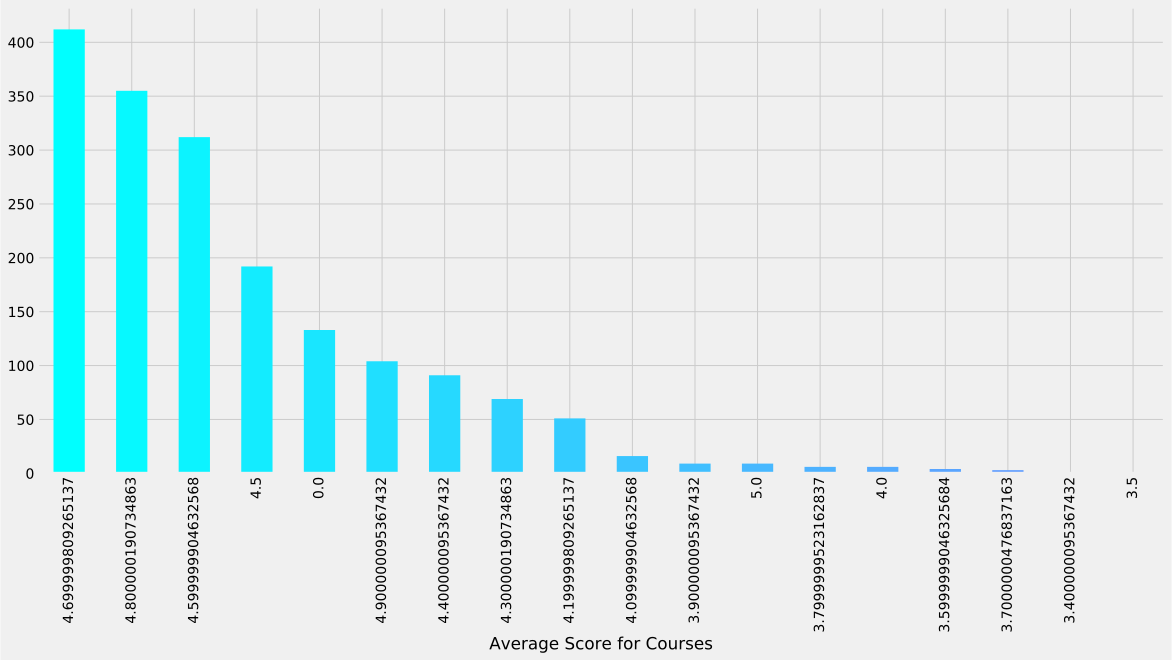

In [10]:
#визуализируем распредение оценок по всем курсам

plt.rcParams['figure.figsize'] = (18, 8)
plt.style.use('fivethirtyeight')

color = plt.cm.cool(np.linspace(0, 2, 80))
#pd.options.display.float_format = '{:,.1f}'.format
courses_df['average_score'].value_counts().plot.bar(color = color)
#plt.title('Average Score for Courses', fontsize = 20, fontweight = 30)
plt.xlabel('Average Score for Courses')
plt.show()

In [11]:
#Распредение признаков language
courses_df['language'].value_counts()

English                   1299
Spanish                    193
Chinese (Simplified)        83
Russian                     72
French                      53
Portuguese (Brazilian)      30
Chinese (Traditional)       27
Turkish                      4
None                         4
Arabic                       3
Hebrew                       3
Ukrainian                    2
Swedish                      1
Name: language, dtype: int64

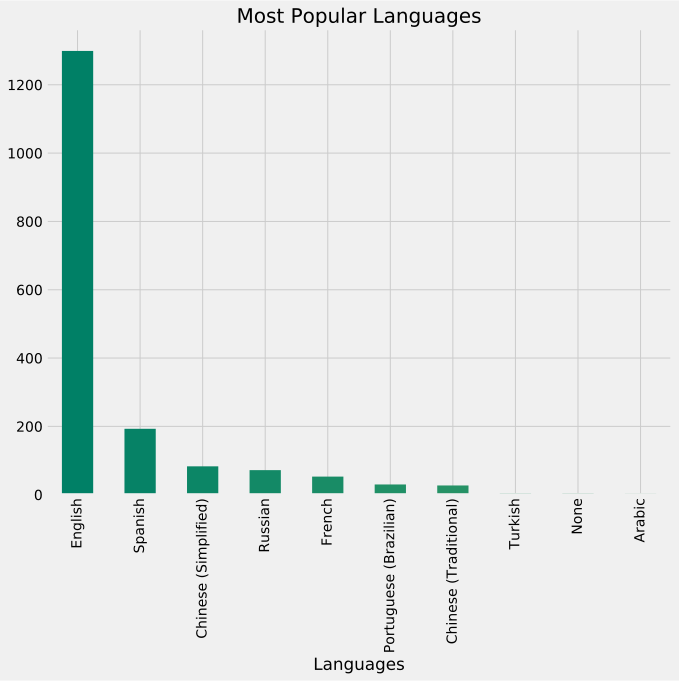

In [12]:
#визуализируем самые популярные языки курсов

plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('fivethirtyeight')

color = plt.cm.summer(np.linspace(0, 2, 80))
courses_df['language'].value_counts().head(10).plot.bar(color = color)
plt.title('Most Popular Languages', fontsize = 20, fontweight = 30)
plt.xlabel('Languages')
plt.show()

## Курсы на разных языках, но большинство (1299 курсов) - на английском, поэтому в дальнейшем будем исследовать курсы на английском языке

In [13]:
#Для удобства работы с языковыми библиотеками выделим из общего датасета курсы на английском

In [14]:
courses_eng = courses_df[courses_df['language'] == 'English']
courses_eng.tail(5)

,course_id,title,topics,about,instructors,language,metrics,product_glance,average_score,ratings_count,reviews_count,skills,syllabus,recommendations,url
1760,yingyuyanjiang,Essentials for English Speeches and Presentati...,"['Personal Development', 'Personal Development']",Students must learn essential knowledge and sk...,['Hongyan 宏岩 ZHANG 张'],English,"['16,553 already enrolled!', '3,346 recent vie...","['100% online', 'Flexible deadlines', 'Approx....",4.7,28,28,[],"['Week 1. 学习策略 Learning Strategy', 'Week2. 语音语...","['sel-capstone', 'expanding-sel']",https://www.coursera.org/learn/yingyuyanjiang
1761,youth-health,Global Adolescent Health,"['Health', 'Public Health']",This course will explore the dynamic factors a...,"['Professor Susan Sawyer', 'Professor George P...",English,"['5,532 already enrolled!', '5,976 recent views']","['100% online', 'Flexible deadlines', 'Beginne...",4.8,15,15,[],['Week 1 - Introduction to adolescent health: ...,"['community-public-health', 'global-health-ove...",https://www.coursera.org/learn/youth-health
1762,youth-sports,The Science of Training Young Athletes,"['Personal Development', 'Personal Development']",Seventy percent of kids drop out of sports bef...,['Dr. Chris Brooks'],English,"['8,948 already enrolled!', '11,144 recent vie...","['100% online', 'Flexible deadlines', 'Beginne...",4.8,70,70,"['Training', 'Coaching', 'Planning', 'Training...","['Week 1: Introduction to the young athlete', ...","['sel-capstone', 'expanding-sel']",https://www.coursera.org/learn/youth-sports
1767,zhexue-daolun,哲学导论（中文版）,"['Arts and Humanities', 'Philosophy']",本课程将为你介绍现代哲学中的一些研究领域。在每个模块中，将由不同的哲学家为你讲述其专业领域内...,"['Dr. Dave Ward', 'Professor Duncan Pritchard...",English,"['15,334 already enrolled!', '2,140 recent vie...","['100% online', 'Flexible deadlines', 'Approx....",4.7,37,37,[],"['什么是哲学？ - Dave Ward', '什么是知识？我们有知识吗？- Duncan ...","['philosophy-cognitive-sciences', 'plato']",https://www.coursera.org/learn/zhexue-daolun
1773,zika,In the footsteps of Zika… approaching the unknown,"['Health', 'Public Health']",Welcome !\n\nWelcome to this on-demand MOOC “I...,"['Antoine Flahault', 'Aline Philibert (In Part...",English,"['3,968 already enrolled!']","['100% online', 'Flexible deadlines', 'Interme...",0.0,0,0,[],"['Introducing Zika virus, its vectors and its ...","['global-health-overview', 'screening']",https://www.coursera.org/learn/zika


In [15]:
courses_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1773
Data columns (total 15 columns):
course_id          1299 non-null object
title              1299 non-null object
topics             1299 non-null object
about              1299 non-null object
instructors        1299 non-null object
language           1299 non-null object
metrics            1299 non-null object
product_glance     1299 non-null object
average_score      1299 non-null float64
ratings_count      1299 non-null int64
reviews_count      1299 non-null int64
skills             1299 non-null object
syllabus           1299 non-null object
recommendations    1299 non-null object
url                1299 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 162.4+ KB


In [16]:
# функция заменяет различные разделители текста пробеламии избавляет тексты от скобок
def change_string(s):
    return ' '.join(s.replace('[', '').replace(']', '').replace(',', '').replace('\'', '').split('|'))
    #return ' '.join(s.lower().replace(' ', '').replace('"\', '').split('|'))

In [17]:
# преобразуем запись текстов в ячейках
courses_eng['topics'] = courses_eng.topics.apply(change_string)
courses_eng['instructors'] = courses_eng.instructors.apply(change_string)
courses_eng['metrics'] = courses_eng.metrics.apply(change_string)
courses_eng['product_glance'] = courses_eng.product_glance.apply(change_string)
courses_eng['skills'] = courses_eng.skills.apply(change_string)
courses_eng['syllabus'] = courses_eng.syllabus.apply(change_string)
courses_eng['recommendations'] = courses_eng.recommendations.apply(change_string)

In [18]:
courses_eng['skills'] = courses_eng.skills.fillna(value = '')

In [19]:
courses_eng.head(2)

,course_id,title,topics,about,instructors,language,metrics,product_glance,average_score,ratings_count,reviews_count,skills,syllabus,recommendations,url
0,2-speed-it,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,16728 already enrolled! 5149 recent views,100% online Flexible deadlines Approx. 21 hour...,4.4,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it
5,3d-printing-applications,3D Printing Applications,Business Entrepreneurship,This course will help you understand how 3D pr...,Vishal Sachdev,English,11308 already enrolled! 8209 recent views,100% online Flexible deadlines Beginner Level ...,4.5,92,92,,Course Orientation Module 1: 3D Printing – A N...,mechanics2 beam-bending,https://www.coursera.org/learn/3d-printing-app...


In [20]:
#проверим пропущенные значения
courses_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1773
Data columns (total 15 columns):
course_id          1299 non-null object
title              1299 non-null object
topics             1299 non-null object
about              1299 non-null object
instructors        1299 non-null object
language           1299 non-null object
metrics            1299 non-null object
product_glance     1299 non-null object
average_score      1299 non-null float64
ratings_count      1299 non-null int64
reviews_count      1299 non-null int64
skills             1299 non-null object
syllabus           1299 non-null object
recommendations    1299 non-null object
url                1299 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 162.4+ KB


In [21]:
#проверим пропущенные оценки и ревью
courses_eng_zero = courses_eng[courses_eng['average_score'] == 0]
courses_eng_zero

,course_id,title,topics,about,instructors,language,metrics,product_glance,average_score,ratings_count,reviews_count,skills,syllabus,recommendations,url
12,academic-discussion-english,Academic Discussions in English,Language Learning Learning English,This is the third course in the Learn English:...,Tamy Chapman Meg Parker Helen Nam Brad Gilpin,English,11916 already enrolled! 8010 recent views,Course 3 of 4 in the 100% online Flexible dead...,0.0,0,0,,Introduction to Discussions Elaboration Intera...,conjunctions-connectives-adverb-clauses noun-c...,https://www.coursera.org/learn/academic-discus...
40,advancedneurobiologyii,Advanced Neurobiology II,Health Basic Science,Hello everyone! Welcome to advanced neurobiolo...,Chenjian Li Donggen Luo Yan Zhang,English,7307 already enrolled! 3099 recent views,100% online Flexible deadlines Intermediate Le...,0.0,0,0,,Perception: Vision Perception: Auditory Chemos...,advanced-neurobiology1 medical-neuroscience,https://www.coursera.org/learn/advancedneurobi...
72,analysis-business-problem-iese,Analysis of Business Problems,Business Marketing,When does an opportunity to increase the botto...,Carlos García Pont,English,1615 recent views,Course 5 of 5 in the 100% online Flexible dead...,0.0,0,0,,Course Overview and Week 1-Analysis of Busines...,international-business-capstone survey-data-ca...,https://www.coursera.org/learn/analysis-busine...
140,be-a-leader,"Be a Leader, Develop a Leader",Business Leadership and Management,The objectives of this MOOC are to enable you ...,Ronald Fry Melvin Smith Ellen VanOosten PhD D...,English,3377 recent views,Course 5 of 5 in the 100% online Flexible dead...,0.0,0,0,,Be a Leader Developing Your Personal Vision De...,nonprofit-gov-capstone survey-data-capstone,https://www.coursera.org/learn/be-a-leader
155,big-data-cloud-computing-cdn,Big Data Emerging Technologies,Information Technology Data Management,"Every time you use Google to search something,...",Jong-Moon Chung,English,2340 already enrolled! 9189 recent views,Course 1 of 4 in the 100% online Flexible dead...,0.0,0,0,,Big Data Rankings & Products Big Data & Hadoop...,cybersecurity-gateway-2 cybersecurity-essentia...,https://www.coursera.org/learn/big-data-cloud-...
173,bioinformatics-project,Bioinformatics Capstone: Big Data in Biology,Health Health Informatics,"In this course, you will learn how to use the ...",Phillip Compeau Pavel Pevzner,English,2114 recent views,Course 7 of 7 in the 100% online Flexible dead...,0.0,0,0,,Week 1: Identifying the Culprit in a Food Pois...,,https://www.coursera.org/learn/bioinformatics-...
184,build-app,Build Your Own iOS App,Computer Science Mobile and Web Development,In the Build Your Own iOS App capstone you wil...,Parham Aarabi,English,,Course 4 of 4 in the 100% online Flexible dead...,0.0,0,0,,Welcome to Build Your Own iOS App Facetracker ...,iosswift security,https://www.coursera.org/learn/build-app
228,capital-budgeting,Applying Investment Decision Rules for Startups,Business Finance,"In the previous course, you learned financial ...",Saeyeul Park,English,2280 already enrolled!,Course 4 of 5 in the 100% online Flexible dead...,0.0,0,0,,Capital Budgeting techniques Project Analysis ...,corporate-entrepreneurs-financing corporate-en...,https://www.coursera.org/learn/capital-budgeting
232,career-brand-development-self-coaching,Career Brand Development and Self-Coaching,Personal Development Personal Development,"In this course, you will engage in developing ...",Dr. Valeri Chukhlomin Dr. Michele Forte Dr. Ky...,English,13438 already enrolled! 3387 recent views,Course 2 of 4 in the 100% online Flexible dead...,0.0,0,0,,Harnessing the Power of Personal Analytics for...,coaching-conversations coaching-practices,https://www.coursera.org/learn/career-brand-de...
353,creating-innovation,Creating Innovation,Business Leadership and Management,The third course of the specialization CREATIN...,David Baker David Christian Shawn Ross,English,1712 already enrolled! 1706 rec

In [22]:
# количество курсов без оценок - не избавляемся от них, т.к. они могут быть полезными для вывода курса по авторам и др.
len(courses_eng_zero)

47

In [23]:
# сохраним внесённые изменения в датасете reviews_eng_courses и 
#courses_eng.to_csv('courses_eng_1.csv')
courses_eng = pd.read_csv('courses_eng_1.csv')
courses_eng.head(2)

,Unnamed: 0,course_id,title,topics,about,instructors,language,metrics,product_glance,average_score,ratings_count,reviews_count,skills,syllabus,recommendations,url
0,0,2-speed-it,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,16728 already enrolled! 5149 recent views,100% online Flexible deadlines Approx. 21 hour...,4.4,33,33,NaN,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it
1,5,3d-printing-applications,3D Printing Applications,Business Entrepreneurship,This course will help you understand how 3D pr...,Vishal Sachdev,English,11308 already enrolled! 8209 recent views,100% online Flexible deadlines Beginner Level ...,4.5,92,92,NaN,Course Orientation Module 1: 3D Printing – A N...,mechanics2 beam-bending,https://www.coursera.org/learn/3d-printing-app...


In [24]:
#избавимся от лишних столбцов
courses_eng=courses_eng.drop(['Unnamed: 0'], axis=1)
courses_eng.head(2)

,course_id,title,topics,about,instructors,language,metrics,product_glance,average_score,ratings_count,reviews_count,skills,syllabus,recommendations,url
0,2-speed-it,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,16728 already enrolled! 5149 recent views,100% online Flexible deadlines Approx. 21 hour...,4.4,33,33,NaN,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it
1,3d-printing-applications,3D Printing Applications,Business Entrepreneurship,This course will help you understand how 3D pr...,Vishal Sachdev,English,11308 already enrolled! 8209 recent views,100% online Flexible deadlines Beginner Level ...,4.5,92,92,NaN,Course Orientation Module 1: 3D Printing – A N...,mechanics2 beam-bending,https://www.coursera.org/learn/3d-printing-app...


In [25]:
courses_eng['skills'] = courses_eng.skills.fillna(value = '')
courses_eng.head(2)

,course_id,title,topics,about,instructors,language,metrics,product_glance,average_score,ratings_count,reviews_count,skills,syllabus,recommendations,url
0,2-speed-it,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,16728 already enrolled! 5149 recent views,100% online Flexible deadlines Approx. 21 hour...,4.4,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it
1,3d-printing-applications,3D Printing Applications,Business Entrepreneurship,This course will help you understand how 3D pr...,Vishal Sachdev,English,11308 already enrolled! 8209 recent views,100% online Flexible deadlines Beginner Level ...,4.5,92,92,,Course Orientation Module 1: 3D Printing – A N...,mechanics2 beam-bending,https://www.coursera.org/learn/3d-printing-app...


# Oбъединим датафрейм описания англоязычных курсов с отзывами пользователей 

In [26]:
#датасет с отзывами по англоязычным курсам
reviews_eng_courses = pd.read_csv('reviews_eng_courses.csv')
reviews_eng_courses.head()

,url,course_id,reviewer_name,rating,review_text
0,https://www.coursera.org/learn/2-speed-it/revi...,2-speed-it,Ravish,5,Very relevant and useful course designed for CIOs
1,https://www.coursera.org/learn/2-speed-it/revi...,2-speed-it,Etienne R,2,This course does not say anything about digiti...
2,https://www.coursera.org/learn/2-speed-it/revi...,2-speed-it,Viswas P,4,Videos that are presented in French could've b...
3,https://www.coursera.org/learn/2-speed-it/revi...,2-speed-it,AN L,3,"The course content is quite good, though it co..."
4,https://www.coursera.org/learn/2-speed-it/revi...,2-speed-it,Konstantin A,5,"Great piece of work, I especially liked a few ..."


In [27]:
#избавимся от лишних столбцов
reviews_eng_courses=reviews_eng_courses.drop(['url'], axis=1)
reviews_eng_courses.head()

,course_id,reviewer_name,rating,review_text
0,2-speed-it,Ravish,5,Very relevant and useful course designed for CIOs
1,2-speed-it,Etienne R,2,This course does not say anything about digiti...
2,2-speed-it,Viswas P,4,Videos that are presented in French could've b...
3,2-speed-it,AN L,3,"The course content is quite good, though it co..."
4,2-speed-it,Konstantin A,5,"Great piece of work, I especially liked a few ..."


In [28]:
#объединим датафрейм описания англоязычных курсов с отзывами пользователей 
joined_users_reviews = reviews_eng_courses.join(courses_eng.set_index('course_id'), on='course_id')
joined_users_reviews.head(2)

,course_id,reviewer_name,rating,review_text,title,topics,about,instructors,language,metrics,product_glance,average_score,ratings_count,reviews_count,skills,syllabus,recommendations,url
0,2-speed-it,Ravish,5,Very relevant and useful course designed for CIOs,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,16728 already enrolled! 5149 recent views,100% online Flexible deadlines Approx. 21 hour...,4.4,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it
1,2-speed-it,Etienne R,2,This course does not say anything about digiti...,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,16728 already enrolled! 5149 recent views,100% online Flexible deadlines Approx. 21 hour...,4.4,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it


In [29]:
unique_reviewers = joined_users_reviews.reviewer_name.unique()
unique_reviewers

array(['Ravish', 'Etienne R', 'Viswas P', ..., 'Jorge R N V',
       'Ricardo d M V', 'Gabriel S C'], dtype=object)

In [30]:
joined_users_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160092 entries, 0 to 160091
Data columns (total 18 columns):
course_id          160092 non-null object
reviewer_name      159841 non-null object
rating             160092 non-null int64
review_text        160085 non-null object
title              160092 non-null object
topics             160092 non-null object
about              160092 non-null object
instructors        160092 non-null object
language           160092 non-null object
metrics            159938 non-null object
product_glance     160092 non-null object
average_score      160092 non-null float64
ratings_count      160092 non-null int64
reviews_count      160092 non-null int64
skills             160092 non-null object
syllabus           160092 non-null object
recommendations    151963 non-null object
url                160092 non-null object
dtypes: float64(1), int64(3), object(14)
memory usage: 22.0+ MB


In [31]:
joined_users_reviews.reviewer_name.value_counts()

Deleted A          588
JOHN Q             139
Jonathan G         126
Joy S              101
Richard H           66
Muhammad A          65
Michael B           61
Daniel C            60
David H             58
David M             58
Do H L              57
Michael M           56
Michael S           56
Daniel S            56
David B             54
David S             54
Bart S              50
David D             50
James M             47
Jose A R N          47
Jason M             46
James S             46
Bernard D V         45
Daniel M            45
John C              44
John P              44
Ana R P             44
David C             44
John W              42
Lorena P            42
                  ... 
Jonathan P G C       1
Javier A F I         1
Geok L K             1
roberto s            1
Annemiek R           1
龚天添                  1
yinxz                1
Seth I               1
jimenez j a          1
Moustafa A B D       1
Walid Z              1
MIGUEL A J D L       1
Мухтаров Т 

In [32]:
#Deleted A - это явно не уникальное имя пользователя - надо от него избавиться
#выберем строки (отзывы), чье значение столбца 'reviewer_name' не равно 'nan' и 'Deleted A'
joined_users_reviews = joined_users_reviews.loc[(joined_users_reviews['reviewer_name'] != 'nan') &
                                              (joined_users_reviews['reviewer_name'] != '') &
                                              (joined_users_reviews['reviewer_name'] != 'Deleted A')]

In [33]:
joined_users_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159504 entries, 0 to 160091
Data columns (total 18 columns):
course_id          159504 non-null object
reviewer_name      159253 non-null object
rating             159504 non-null int64
review_text        159497 non-null object
title              159504 non-null object
topics             159504 non-null object
about              159504 non-null object
instructors        159504 non-null object
language           159504 non-null object
metrics            159350 non-null object
product_glance     159504 non-null object
average_score      159504 non-null float64
ratings_count      159504 non-null int64
reviews_count      159504 non-null int64
skills             159504 non-null object
syllabus           159504 non-null object
recommendations    151393 non-null object
url                159504 non-null object
dtypes: float64(1), int64(3), object(14)
memory usage: 23.1+ MB


In [34]:
joined_users_reviews['course_id'] = joined_users_reviews['course_id'].astype(str)
joined_users_reviews['reviewer_name'] = joined_users_reviews['reviewer_name'].astype(str)
joined_users_reviews['review_text'] = joined_users_reviews['review_text'].astype(str)
joined_users_reviews['title'] = joined_users_reviews['title'].astype(str)
joined_users_reviews['topics'] = joined_users_reviews['topics'].astype(str)
joined_users_reviews['about'] = joined_users_reviews['about'].astype(str)
joined_users_reviews['instructors'] = joined_users_reviews['instructors'].astype(str)
joined_users_reviews['language'] = joined_users_reviews['language'].astype(str)
joined_users_reviews['metrics'] = joined_users_reviews['metrics'].astype(str)
joined_users_reviews['product_glance'] = joined_users_reviews['product_glance'].astype(str)
joined_users_reviews['skills'] = joined_users_reviews['skills'].astype(str)
joined_users_reviews['syllabus'] = joined_users_reviews['syllabus'].astype(str)
joined_users_reviews['recommendations'] = joined_users_reviews['recommendations'].astype(str)
joined_users_reviews['url'] = joined_users_reviews['url'].astype(str)

In [35]:
# сохраним внесённые изменения в датасете joined_users_reviews  
#joined_users_reviews.to_csv('joined_users_reviews.csv') #выполняется 1 раз
joined_users_reviews = pd.read_csv('joined_users_reviews.csv')
joined_users_reviews.head(2)

,Unnamed: 0,course_id,reviewer_name,rating,review_text,title,topics,about,instructors,language,metrics,product_glance,average_score,ratings_count,reviews_count,skills,syllabus,recommendations,url
0,0,2-speed-it,Ravish,5,Very relevant and useful course designed for CIOs,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,16728 already enrolled! 5149 recent views,100% online Flexible deadlines Approx. 21 hour...,4.4,33,33,NaN,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it
1,1,2-speed-it,Etienne R,2,This course does not say anything about digiti...,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,16728 already enrolled! 5149 recent views,100% online Flexible deadlines Approx. 21 hour...,4.4,33,33,NaN,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it


In [36]:
#избавимся от лишних столбцов
joined_users_reviews=joined_users_reviews.drop(['Unnamed: 0'], axis=1)
joined_users_reviews['skills'] = joined_users_reviews.skills.fillna(value = '')
joined_users_reviews.head(2)

,course_id,reviewer_name,rating,review_text,title,topics,about,instructors,language,metrics,product_glance,average_score,ratings_count,reviews_count,skills,syllabus,recommendations,url
0,2-speed-it,Ravish,5,Very relevant and useful course designed for CIOs,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,16728 already enrolled! 5149 recent views,100% online Flexible deadlines Approx. 21 hour...,4.4,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it
1,2-speed-it,Etienne R,2,This course does not say anything about digiti...,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,16728 already enrolled! 5149 recent views,100% online Flexible deadlines Approx. 21 hour...,4.4,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it


In [37]:
#подготовленный датасет
data = joined_users_reviews
data.head(2)

,course_id,reviewer_name,rating,review_text,title,topics,about,instructors,language,metrics,product_glance,average_score,ratings_count,reviews_count,skills,syllabus,recommendations,url
0,2-speed-it,Ravish,5,Very relevant and useful course designed for CIOs,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,16728 already enrolled! 5149 recent views,100% online Flexible deadlines Approx. 21 hour...,4.4,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it
1,2-speed-it,Etienne R,2,This course does not say anything about digiti...,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,16728 already enrolled! 5149 recent views,100% online Flexible deadlines Approx. 21 hour...,4.4,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it


In [38]:
# области научного знания, к которым относят курсы
data.topics.value_counts()

Data Science Data Analysis                                                   15401
Arts and Humanities Music and Art                                            11052
Computer Science Software Development                                        10297
Business Leadership and Management                                            8847
Business Finance                                                              7702
Business Business Essentials                                                  7077
Computer Science Mobile and Web Development                                   6955
Language Learning Learning English                                            6172
Business Marketing                                                            5742
Business Business Strategy                                                    5618
Health Basic Science                                                          5398
Health Psychology                                                             4905
Phys

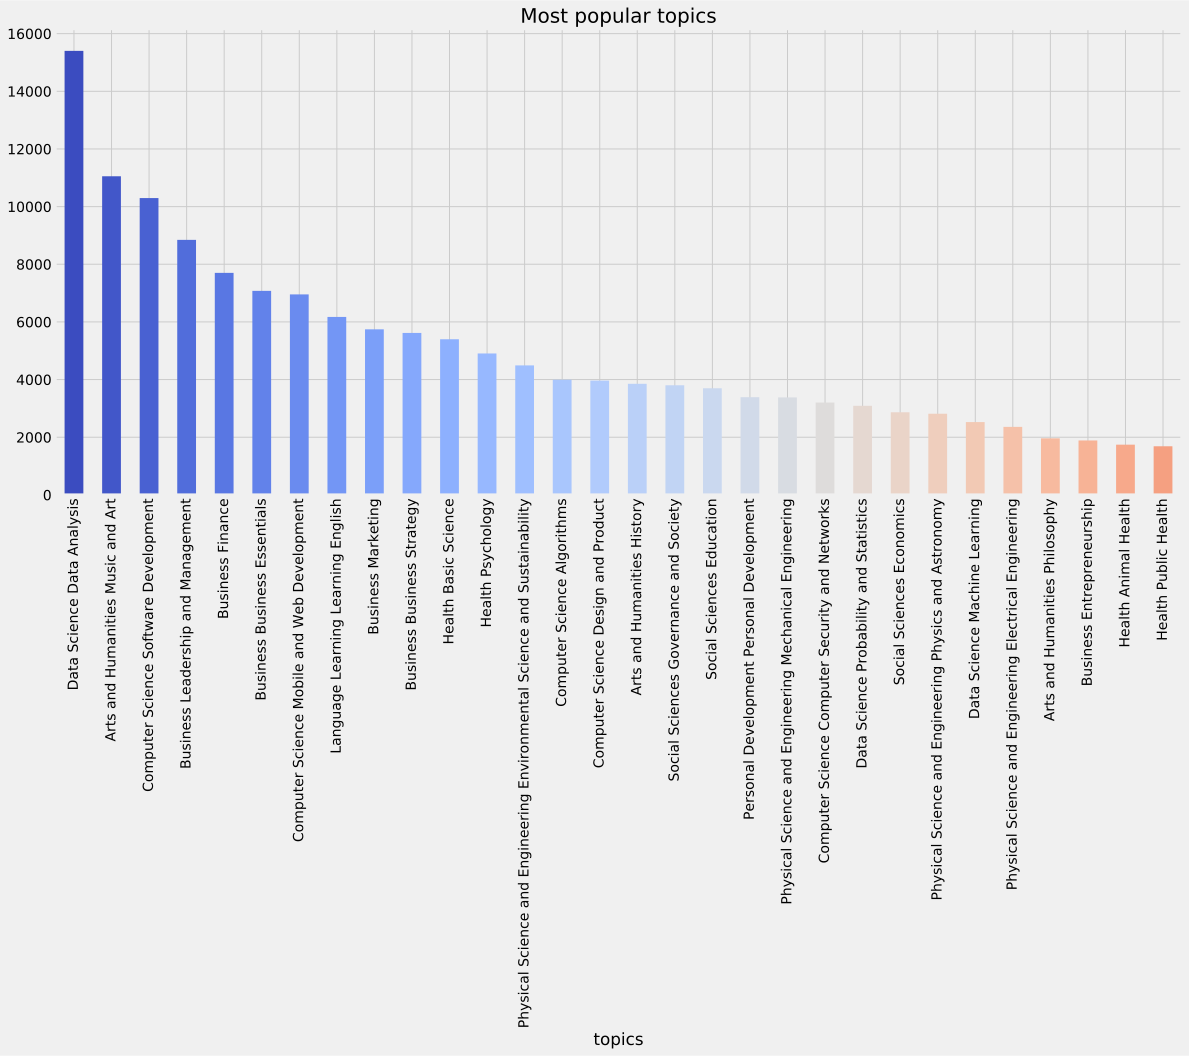

In [39]:
#визуализируем самые часто оцениваемые подразделы наук/знаний (topics)

plt.rcParams['figure.figsize'] = (18, 8)
plt.style.use('fivethirtyeight')

color = plt.cm.coolwarm(np.linspace(0, 2, 80))
joined_users_reviews['topics'].value_counts().head(30).plot.bar(color = color)
plt.title('Most popular topics', fontsize = 20, fontweight = 30)
plt.xlabel('topics')
plt.show()

In [40]:
num_topics = [len(g.split(' ')) for g in data.topics.values]

(array([22037., 35267.,     0., 53899.,     0., 11682., 29061.,     0.,
         2816.,  4491.]),
 array([2. , 2.6, 3.2, 3.8, 4.4, 5. , 5.6, 6.2, 6.8, 7.4, 8. ]),
 <a list of 10 Patch objects>)

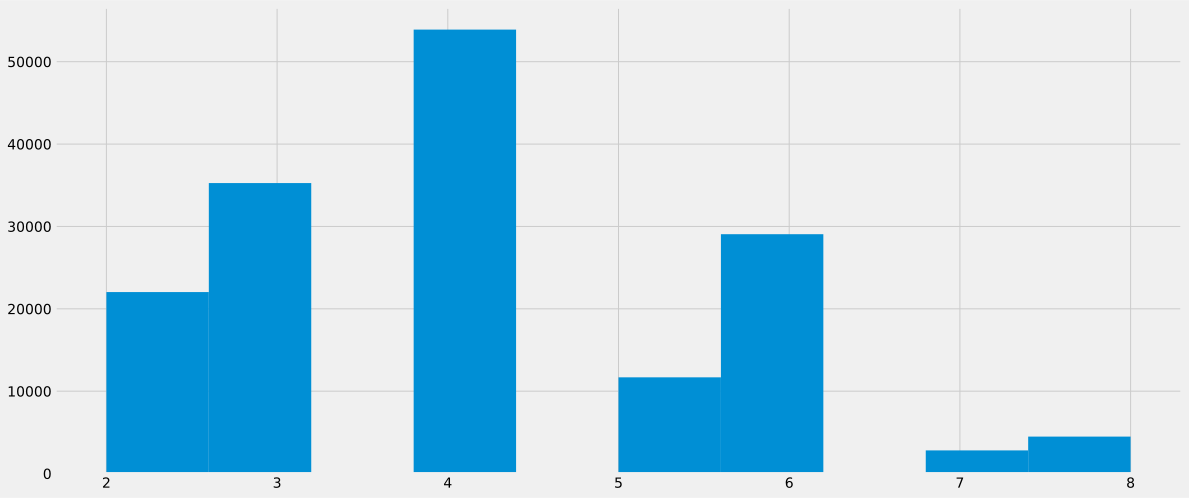

In [41]:
plt.hist(num_topics)

In [42]:
np.mean(num_topics)

4.105963466936259

In [43]:
# навыки, получаемые на курсах - можем использовать как ключевые слова
data["skills"].value_counts()

                                                                                                             33896
Video Game Development C Sharp (C#) (Programming Language) Unity (User Interface) Game Design                 1035
Computer Programming Problem Solving Matlab Programming Language                                               934
Project Management Communication Leadership Team Management                                                    927
Data Manipulation Regular Expression (REGEX) R Programming Data Cleansing                                      905
Dynamic Programming Debugging Software Testing Algorithms Computer Programming                                 894
Data Science Data Analysis Machine Learning Project                                                            879
Philosophy Psychology Mindfulness Meditation                                                                   871
Learning To Learn Lifelong Learning Pomodoro Technique Meta Learning            

In [44]:
num_skills = [len(g.split(' ')) for g in data.skills.values]

(array([3.3896e+04, 5.0950e+03, 3.7870e+04, 4.9730e+04, 1.8366e+04,
        1.0405e+04, 3.2470e+03, 4.9600e+02, 1.0400e+02, 4.4000e+01]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <a list of 10 Patch objects>)

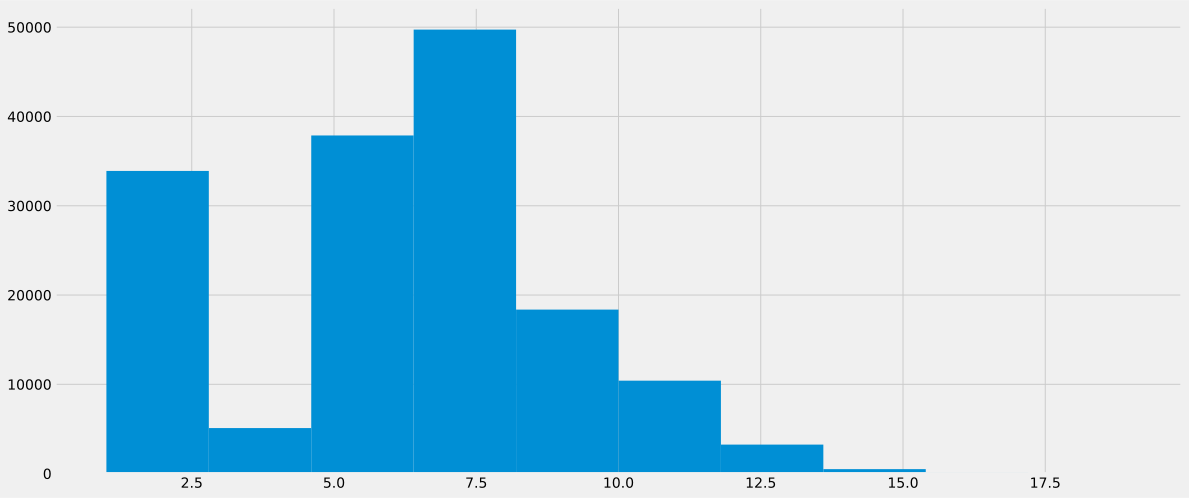

In [45]:
#визуализируем количество skills на курс
plt.hist(num_skills)

In [46]:
np.mean(num_skills)

5.993205779482961

## Добавим фичей к датасету

In [47]:
# используя регулярные выражения, выделим фичи из metrics: к-во зарегистрировавшихся и к-во просмотров
# из них можем получить значение конверсии - отношение зарегистрировавшихся к просмотревшим страницу курса за последнее время
data.metrics.head()

0    16728 already enrolled! 5149 recent views
1    16728 already enrolled! 5149 recent views
2    16728 already enrolled! 5149 recent views
3    16728 already enrolled! 5149 recent views
4    16728 already enrolled! 5149 recent views
Name: metrics, dtype: object

In [48]:
data['metrics'] = data['metrics'].astype(str)

In [49]:
import re

pattern_already_enrolled = '(\d+) already enrolled!'
pattern_recent_views = '(\d+) recent views'

def find_pattern(string, pattern):

    """
    аргументы: string - текстовая строка для поиска
    pattern - шаблон регулярного выражения

    функция осуществляет поиск шаблона "pattern" в строке "string" используя правила регулярных выражений(RegExp).
    Если шаблон найден - возвращает значение, иначе - возвращает None
    """
    if re.search(pattern, string):
        return re.search(pattern, string).group(1)
    
data['already_enrolled'] = data['metrics'].apply(lambda x: find_pattern(x,pattern_already_enrolled))
data['recent_views'] = data['metrics'].apply(lambda x: find_pattern(x,pattern_recent_views))

data.tail()

,course_id,reviewer_name,rating,review_text,title,topics,about,instructors,language,metrics,product_glance,average_score,ratings_count,reviews_count,skills,syllabus,recommendations,url,already_enrolled,recent_views
159248,zika,Ricardo d M V,4,Trendy topic with talks from expertises in the...,In the footsteps of Zika… approaching the unknown,Health Public Health,Welcome !\n\nWelcome to this on-demand MOOC “I...,Antoine Flahault Aline Philibert (In Partnersh...,English,3968 already enrolled!,100% online Flexible deadlines Intermediate Le...,0.0,0,0,,Introducing Zika virus its vectors and its hos...,global-health-overview screening,https://www.coursera.org/learn/zika,3968,None
159249,zika,Gabriel S C,5,"Wonderful! Simple and clear language, good ins...",In the footsteps of Zika… approaching the unknown,Health Public Health,Welcome !\n\nWelcome to this on-demand MOOC “I...,Antoine Flahault Aline Philibert (In Partnersh...,English,3968 already enrolled!,100% online Flexible deadlines Intermediate Le...,0.0,0,0,,Introducing Zika virus its vectors and its hos...,global-health-overview screening,https://www.coursera.org/learn/zika,3968,None
159250,zika,JOHN Q,5,an interesting and fun course. thanks. d...,In the footsteps of Zika… approaching the unknown,Health Public Health,Welcome !\n\nWelcome to this on-demand MOOC “I...,Antoine Flahault Aline Philibert (In Partnersh...,English,3968 already enrolled!,100% online Flexible deadlines Intermediate Le...,0.0,0,0,,Introducing Zika virus its vectors and its hos...,global-health-overview screening,https://www.coursera.org/learn/zika,3968,None
159251,zika,Yotam L,4,"very broad perspective, up to date information...",In the footsteps of Zika… approaching the unknown,Health Public Health,Welcome !\n\nWelcome to this on-demand MOOC “I...,Antoine Flahault Aline Philibert (In Partnersh...,English,3968 already enrolled!,100% online Flexible deadlines Intermediate Le...,0.0,0,0,,Introducing Zika virus its vectors and its hos...,global-health-overview screening,https://www.coursera.org/learn/zika,3968,None
159252,zika,MITESH S,4,An informative course on the social and financ...,In the footsteps of Zika… approaching the unknown,Health Public Health,Welcome !\n\nWelcome to this on-demand MOOC “I...,Antoine Flahault Aline Philibert (In Partnersh...,English,3968 already enrolled!,100% online Flexible deadlines Intermediate Le...,0.0,0,0,,Introducing Zika virus its vectors and its hos...,global-health-overview screening,https://www.coursera.org/learn/zika,3968,None


In [50]:
#заменим None на '' и избавимся от столбца metrics
data['already_enrolled'] = data.already_enrolled.fillna(0)
data['recent_views'] = data.recent_views.fillna(0)

data=data.drop(['metrics'], axis=1)

data.tail(3)

,course_id,reviewer_name,rating,review_text,title,topics,about,instructors,language,product_glance,average_score,ratings_count,reviews_count,skills,syllabus,recommendations,url,already_enrolled,recent_views
159250,zika,JOHN Q,5,an interesting and fun course. thanks. d...,In the footsteps of Zika… approaching the unknown,Health Public Health,Welcome !\n\nWelcome to this on-demand MOOC “I...,Antoine Flahault Aline Philibert (In Partnersh...,English,100% online Flexible deadlines Intermediate Le...,0.0,0,0,,Introducing Zika virus its vectors and its hos...,global-health-overview screening,https://www.coursera.org/learn/zika,3968,0
159251,zika,Yotam L,4,"very broad perspective, up to date information...",In the footsteps of Zika… approaching the unknown,Health Public Health,Welcome !\n\nWelcome to this on-demand MOOC “I...,Antoine Flahault Aline Philibert (In Partnersh...,English,100% online Flexible deadlines Intermediate Le...,0.0,0,0,,Introducing Zika virus its vectors and its hos...,global-health-overview screening,https://www.coursera.org/learn/zika,3968,0
159252,zika,MITESH S,4,An informative course on the social and financ...,In the footsteps of Zika… approaching the unknown,Health Public Health,Welcome !\n\nWelcome to this on-demand MOOC “I...,Antoine Flahault Aline Philibert (In Partnersh...,English,100% online Flexible deadlines Intermediate Le...,0.0,0,0,,Introducing Zika virus its vectors and its hos...,global-health-overview screening,https://www.coursera.org/learn/zika,3968,0


In [51]:
#рассчитаем значение конверсии - отношение зарегистрировавшихся на курс к просмотревшим страницу курса 
#(already_enrolled / recent_views) *100
data['already_enrolled'] = data['already_enrolled'].astype(int)
data['recent_views'] = data['recent_views'].astype(int)

In [52]:
def conversion_formula(x, y):
    if y == 0:
        return 0
    else:
        return round(((x/y) * 100),1)

#data['recent_views_conversion'] = df.apply(lambda row: conversion_formula(row['x'], row['y']), axis=1)
data['recent_views_conversion'] = [conversion_formula(x, y) for x, y in zip(data['already_enrolled'], data['recent_views'])]

data.tail(3)

,course_id,reviewer_name,rating,review_text,title,topics,about,instructors,language,product_glance,average_score,ratings_count,reviews_count,skills,syllabus,recommendations,url,already_enrolled,recent_views,recent_views_conversion
159250,zika,JOHN Q,5,an interesting and fun course. thanks. d...,In the footsteps of Zika… approaching the unknown,Health Public Health,Welcome !\n\nWelcome to this on-demand MOOC “I...,Antoine Flahault Aline Philibert (In Partnersh...,English,100% online Flexible deadlines Intermediate Le...,0.0,0,0,,Introducing Zika virus its vectors and its hos...,global-health-overview screening,https://www.coursera.org/learn/zika,3968,0,0.0
159251,zika,Yotam L,4,"very broad perspective, up to date information...",In the footsteps of Zika… approaching the unknown,Health Public Health,Welcome !\n\nWelcome to this on-demand MOOC “I...,Antoine Flahault Aline Philibert (In Partnersh...,English,100% online Flexible deadlines Intermediate Le...,0.0,0,0,,Introducing Zika virus its vectors and its hos...,global-health-overview screening,https://www.coursera.org/learn/zika,3968,0,0.0
159252,zika,MITESH S,4,An informative course on the social and financ...,In the footsteps of Zika… approaching the unknown,Health Public Health,Welcome !\n\nWelcome to this on-demand MOOC “I...,Antoine Flahault Aline Philibert (In Partnersh...,English,100% online Flexible deadlines Intermediate Le...,0.0,0,0,,Introducing Zika virus its vectors and its hos...,global-health-overview screening,https://www.coursera.org/learn/zika,3968,0,0.0


In [53]:
#посмотрим какие фичи можно выделить из product_glance
#к-во часов для прохождения курса (hours to complete) и ранг курса (Level)
data.product_glance.value_counts()

100% online Flexible deadlines Approx. 11 hours to complete English                                            2995
100% online Flexible deadlines Approx. 18 hours to complete English                                            2939
100% online Flexible deadlines Beginner Level Approx. 14 hours to complete English                             2868
100% online Flexible deadlines Approx. 12 hours to complete English                                            2484
100% online Flexible deadlines Approx. 16 hours to complete English                                            2418
100% online Flexible deadlines Beginner Level Approx. 19 hours to complete English                             2243
100% online Flexible deadlines Beginner Level Approx. 11 hours to complete English                             2237
100% online Flexible deadlines Approx. 17 hours to complete English                                            2181
100% online Flexible deadlines Approx. 10 hours to complete English     

In [54]:
#используя регулярные выражения, выделим фичи из product_glance: к-во часов для прохождения курса 
data['product_glance'] = data['product_glance'].astype(str)
pattern_hours_to_complete = '(\d+) hours to complete English'
data['hours_to_complete'] = data['product_glance'].apply(lambda x: find_pattern(x,pattern_hours_to_complete))

data

,course_id,reviewer_name,rating,review_text,title,topics,about,instructors,language,product_glance,...,ratings_count,reviews_count,skills,syllabus,recommendations,url,already_enrolled,recent_views,recent_views_conversion,hours_to_complete
0,2-speed-it,Ravish,5,Very relevant and useful course designed for CIOs,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,100% online Flexible deadlines Approx. 21 hour...,...,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it,16728,5149,324.9,21
1,2-speed-it,Etienne R,2,This course does not say anything about digiti...,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,100% online Flexible deadlines Approx. 21 hour...,...,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it,16728,5149,324.9,21
2,2-speed-it,Viswas P,4,Videos that are presented in French could've b...,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,100% online Flexible deadlines Approx. 21 hour...,...,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it,16728,5149,324.9,21
3,2-speed-it,AN L,3,"The course content is quite good, though it co...",Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,100% online Flexible deadlines Approx. 21 hour...,...,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it,16728,5149,324.9,21
4,2-speed-it,Konstantin A,5,"Great piece of work, I especially liked a few ...",Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,100% online Flexible deadlines Approx. 21 hour...,...,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it,16728,5149,324.9,21
5,2-speed-it,Eduardo F,5,"Excellent course, for me it was very rewarding...",Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,100% online Flexible deadlines Approx. 21 hour...,...,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it,16728,5149,324.9,21
6,2-speed-it,Daniel D,4,Excellent... It is a representation of our day...,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,100% online Flexible deadlines Approx. 21 hour...,...,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it,16728,5149,324.9,21
7,2-speed-it,Rémy C,5,Very interesting and well-designed MOOC !,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,100% online Flexible deadlines Approx. 21 hour...,...,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management en

In [55]:
#ипользуя разделители re выделим ранг курса (Level) и посчитаем их количество:
new_df = data['product_glance'].str.split('.',expand=True)
new_df.columns = ['Approx','hours to complete']
new_df_2 = new_df['Approx'].str.split('deadlines',expand=True)
new_df_2.columns = ['Flexible','Approx']
new_df_3 = new_df_2['Approx'].str.split('Level',expand=True)
new_df_3.columns = ['Level','Approx']

new_df_3['Level'].value_counts()

 Approx           97403
 Beginner         43495
 Intermediate     17176
 Advanced          1179
Name: Level, dtype: int64

In [56]:
def find_level(x):
    '''для удобства использования фичи level_range в расчётах назначим рангам курсов численные обозначения:
        Beginner = 0.1
        Intermediate = 0.5
        Advanced = 0.9
        остальные level_range, если в описании курса не был указан уровень, заполним 0
    '''
    if 'Beginner' in x:
        return .1
    elif 'Intermediate' in x :
        return .5
    elif 'Advanced' in x:
        return .9
    else:
        return 0
    
data['level_range'] = [find_level(x) for x in data['product_glance']]
data=data.drop(['product_glance'], axis=1) #избавимся от колонки product_glance

data.head()

,course_id,reviewer_name,rating,review_text,title,topics,about,instructors,language,average_score,...,reviews_count,skills,syllabus,recommendations,url,already_enrolled,recent_views,recent_views_conversion,hours_to_complete,level_range
0,2-speed-it,Ravish,5,Very relevant and useful course designed for CIOs,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,4.4,...,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it,16728,5149,324.9,21,0.0
1,2-speed-it,Etienne R,2,This course does not say anything about digiti...,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,4.4,...,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it,16728,5149,324.9,21,0.0
2,2-speed-it,Viswas P,4,Videos that are presented in French could've b...,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,4.4,...,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it,16728,5149,324.9,21,0.0
3,2-speed-it,AN L,3,"The course content is quite good, though it co...",Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,4.4,...,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it,16728,5149,324.9,21,0.0
4,2-speed-it,Konstantin A,5,"Great piece of work, I especially liked a few ...",Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,English,4.4,...,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it,16728,5149,324.9,21,0.0


In [57]:
#а так же можем избавиться от колонки language
data=data.drop(['language'], axis=1)
data.head()

,course_id,reviewer_name,rating,review_text,title,topics,about,instructors,average_score,ratings_count,reviews_count,skills,syllabus,recommendations,url,already_enrolled,recent_views,recent_views_conversion,hours_to_complete,level_range
0,2-speed-it,Ravish,5,Very relevant and useful course designed for CIOs,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,4.4,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it,16728,5149,324.9,21,0.0
1,2-speed-it,Etienne R,2,This course does not say anything about digiti...,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,4.4,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it,16728,5149,324.9,21,0.0
2,2-speed-it,Viswas P,4,Videos that are presented in French could've b...,Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,4.4,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it,16728,5149,324.9,21,0.0
3,2-speed-it,AN L,3,"The course content is quite good, though it co...",Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,4.4,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it,16728,5149,324.9,21,0.0
4,2-speed-it,Konstantin A,5,"Great piece of work, I especially liked a few ...",Two Speed IT: How Companies Can Surf the Digit...,Business Business Essentials,"Transform or disappear, the Darwinism of IT: I...",Antoine Gourévitch Vanessa Lyon Eric Baudson,4.4,33,33,,Introduction IT and the CIO in the Digital Wor...,fundamentals-of-management entrepreneurial-thi...,https://www.coursera.org/learn/2-speed-it,16728,5149,324.9,21,0.0


In [58]:
# сохраним внесённые изменения в датасете joined_users_reviews  
#data.to_csv('data.csv') #выполняется 1 раз